<a href="https://colab.research.google.com/github/sdivyakolu/Pytorch_Tutorial/blob/main/EMNIST_Classification_UsingDNN_DenseNuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 53.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [5]:
pip install torch matplotlib numpy pandas torchvision

In [3]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 14.2 MB/s eta 0:00:00


In [6]:
pip install pyngrok

In [7]:
#Run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &")

#Create remote tunnel using ngrok.com to allow local port access
from pyngrok import ngrok

#Terminate open turnnels if they exists
ngrok.kill()

#Setting the authtoken ( optional)
#Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN="2yVqRPkzG1tUdthF1CtvMkgaPz2_32B4CGeeG5A1tXrnLeC4u"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

#Open an https tunnel on port 5000 for http://localhost:5000
ngrok_tunnel=ngrok.connect(addr="5000",proto="http",bind_tls=True)

print("MLFlow Tracking UI:",ngrok_tunnel.public_url)

MLFlow Tracking UI: https://f7e2-34-10-254-165.ngrok-free.app


In [8]:
import mlflow
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.utils.data import Dataset,DataLoader



In [13]:
from google.colab import drive

#drive.mount('/content/drive')
#drive.mount("/content/sample_data")

emnist_train_data=pd.read_csv("/content/sample_data/emnist-letters-train.csv",header=None)
emnist_test_data=pd.read_csv("/content/sample_data/emnist-letters-test.csv",header=None)
emnist_train_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,17,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,13,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,11,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,24,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
emnist_test_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
emnist_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,62932.000000,62932.0,62932.0,62932.0,62932.000000,62932.000000,62932.000000,62932.000000,62932.000000,62932.000000,...,62931.0,62931.0,62931.0,62931.000000,62931.000000,62931.0,62931.0,62931.0,62931.0,62931.0
mean,13.520117,0.0,0.0,0.0,0.000016,0.004338,0.016097,0.024868,0.020117,0.016812,...,0.0,0.0,0.0,0.004290,0.000508,0.0,0.0,0.0,0.0,0.0
std,7.498946,0.0,0.0,0.0,0.003986,0.591124,1.533763,1.973760,1.833803,1.632050,...,0.0,0.0,0.0,0.978157,0.127561,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,192.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [18]:
emnist_test_data = emnist_test_data.sample(frac=1)
emnist_test_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
6790,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3944,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11172,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14374,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7467,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4822,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12128,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1834,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13431,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13552,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
classes= ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

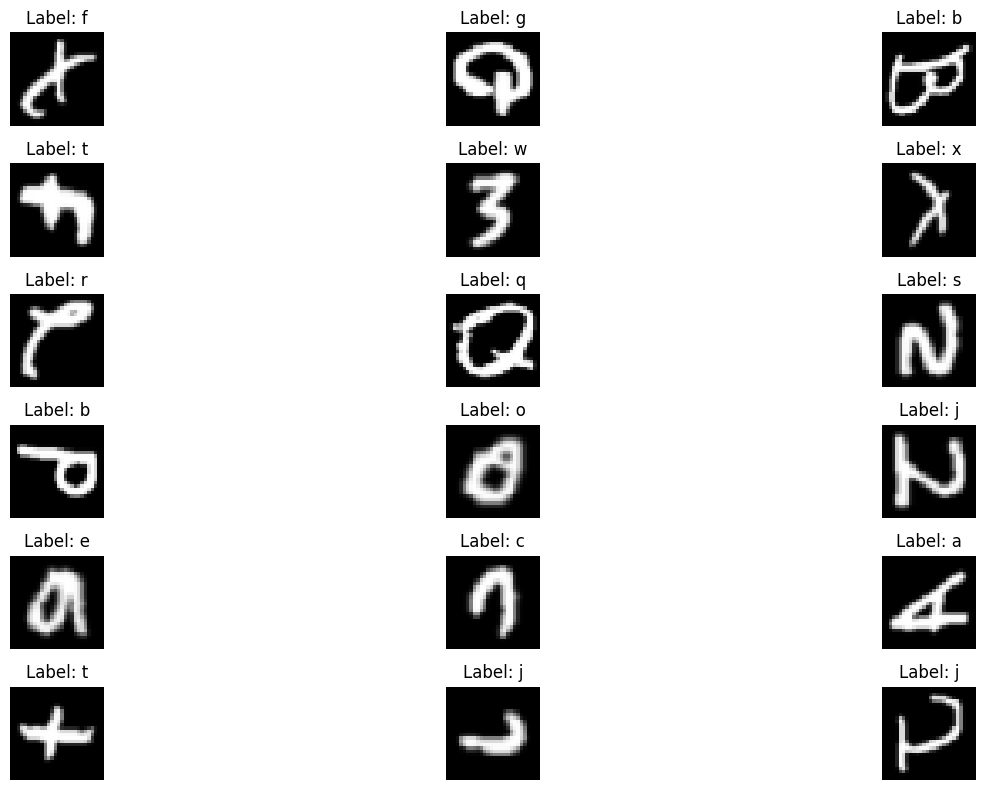

In [21]:
#Assuming first column contains the labels and rest are pixal values
train_labels=emnist_train_data.values[:,0]
train_images=emnist_train_data.values[:,1:]

#Reshape the images to ( num_samples, 28,28)
train_images=train_images.reshape(-1,28,28)

#Display a few random images
num_samples=18

random_indices=np.random.randint(0,len(train_images),num_samples)

random_indices

fig=plt.figure(figsize=(16,8))

for i,idx in enumerate(random_indices):
  plt.subplot(6,int(num_samples/6),i+1)
  plt.imshow(train_images[idx]/255.0,cmap='gray')
  plt.title(f"Label: {classes[int(train_labels[idx]-1)]}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
experiment_id=mlflow.create_experiment(name='test_experiment')
experiment_id

'396831455181425110'